# BIG DATA LAB (10)

___
# <img src='https://www.tu.edu.sa/Content/images/logo-light.png'/>


# BIG DATA  Project 

In this project you will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

This project contains six parts:
* (1) Data Description  
* (2) Data Analysis
* (3) Data Visualization
* (4) Data Preprocessing
* (5) Modelling
* (6) Evaluation

###### Requirments:
Do your best and Use concepts and ideas you learned so far :)
__________________________________________________________________________________________________

# -MEAAD ALZHRANI


#### (1) Data Description  

*Import a few libraries you think you'll need (Or just import them as you go along!)*

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

*Read in the advertising.csv file and set it to a data frame called ad_data.*

In [2]:
ad_data=pd.read_csv('advertising (1)')

*Check the head of ad_data*

In [11]:
ad_data.head()

,User id,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,1,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,NaN,0,Tunisia,2016-03-27 00:53:11,0
1,2,80.23,NaN,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,3,69.47,NaN,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,4,74.15,NaN,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,5,68.37,NaN,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


*Use info and describe() on ad_data*

In [12]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User id                   1000 non-null   int64  
 1   Daily Time Spent on Site  1000 non-null   float64
 2   Age                       985 non-null    float64
 3   Area Income               1000 non-null   float64
 4   Daily Internet Usage      1000 non-null   float64
 5   Ad Topic Line             1000 non-null   object 
 6   City                      998 non-null    object 
 7   Male                      1000 non-null   int64  
 8   Country                   1000 non-null   object 
 9   Timestamp                 1000 non-null   object 
 10  Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 86.1+ KB


In [14]:
ad_data.describe()

,User id,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,985.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,65.000200,36.010152,55000.000080,180.000100,0.481000,0.50000
std,288.819436,15.853615,8.796936,13414.634022,43.902339,0.499889,0.50025
min,1.000000,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,250.750000,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,500.500000,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,750.250000,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,1000.000000,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


### Exploratory Data Analysis

#### (2) Data Analysis

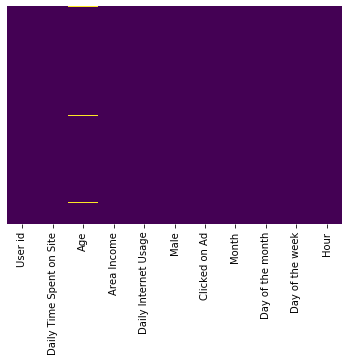

In [26]:
sns.heatmap(ad_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

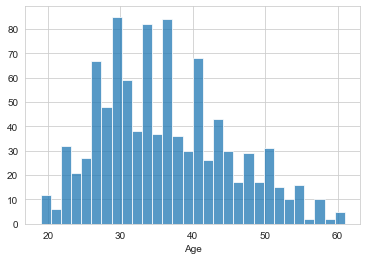

In [27]:
sns.set_style("whitegrid")
sns.distplot(ad_data['Age'],kde=False,bins=30,hist_kws={"alpha":0.75})

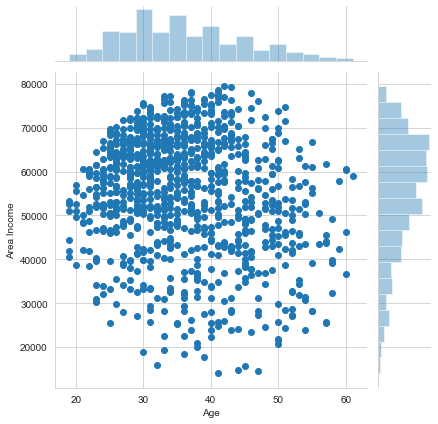

In [28]:
sns.jointplot(x="Age",y="Area Income",data=ad_data)

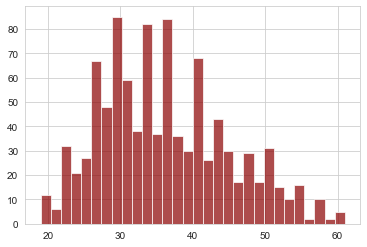

In [29]:
ad_data['Age'].hist(bins=30,color='darkred',alpha=0.7)

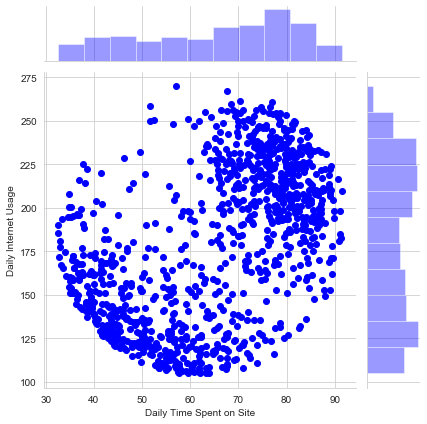

In [30]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,color='blue')

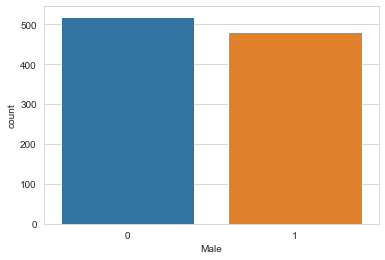

In [31]:
sns.countplot(x='Male',data=ad_data)

#### (3) Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BAD0C2B108>,
      dtype=object)

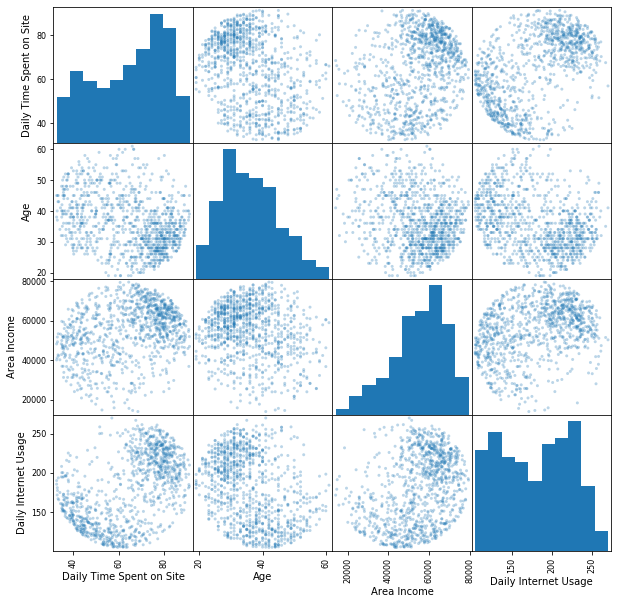

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(ad_data[['Daily Time Spent on Site', 'Age','Area Income', 'Daily Internet Usage']],
    alpha=0.3, figsize=(10,10))

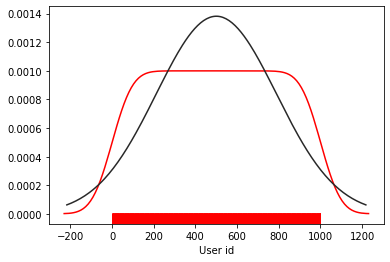

In [16]:
from scipy.stats import norm
sns.distplot(ad_data['User id'], hist=False, color='r', rug=True, fit=norm);

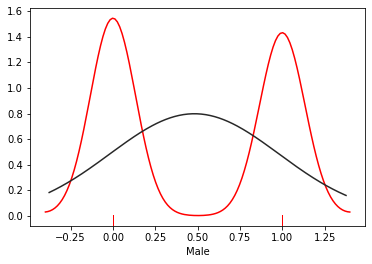

In [17]:
from scipy.stats import norm
sns.distplot(ad_data['Male'], hist=False, color='r', rug=True, fit=norm);

#### (4) Data Preprocessing

In [19]:
object_variables=['Ad Topic Line', 'City', 'Country']

In [20]:
ad_data[object_variables].describe()

,Ad Topic Line,City,Country
count,1000,998,1000
unique,1000,968,237
top,Visionary reciprocal circuit,Williamsport,Czech Republic
freq,1,3,9


In [21]:
pd.crosstab(index=ad_data['Country'], columns='count').sort_values(['count'], ascending=False).head(20)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


In [22]:
ad_data= ad_data.drop(['Ad Topic Line', 'City', 'Country'], axis=1)

In [23]:
ad_data.shape

(1000, 8)

In [24]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User id                   1000 non-null   int64  
 1   Daily Time Spent on Site  1000 non-null   float64
 2   Age                       985 non-null    float64
 3   Area Income               1000 non-null   float64
 4   Daily Internet Usage      1000 non-null   float64
 5   Male                      1000 non-null   int64  
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


In [25]:
ad_data['Timestamp'] = pd.to_datetime(ad_data['Timestamp'])

ad_data['Month'] = ad_data['Timestamp'].dt.month
ad_data['Day of the month'] = ad_data['Timestamp'].dt.day
ad_data["Day of the week"] = ad_data['Timestamp'].dt.dayofweek
ad_data['Hour'] = ad_data['Timestamp'].dt.hour
ad_data= ad_data.drop(['Timestamp'], axis=1)

ad_data.head()

,User id,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day of the month,Day of the week,Hour
0,1,68.95,NaN,61833.90,256.09,0,0,3,27,6,0
1,2,80.23,NaN,68441.85,193.77,1,0,4,4,0,1
2,3,69.47,NaN,59785.94,236.50,0,0,3,13,6,20
3,4,74.15,NaN,54806.18,245.89,1,0,1,10,6,2
4,5,68.37,NaN,73889.99,225.58,0,0,6,3,4,3


#### (5) Modelling

###### You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

** Train and fit **Different Models** on the training set.**

#### (6) Predictions and Evaluations 
** Now predict values for the testing data.**

## Great Job!